# Malaria surveillance using time series forecasting

## Description of indicator
The number of new malaria cases per 1000 population at risk per year. Population at risk is defined as population living in areas where malaria transmission occurs.

#### Common Interpretation in Data Reporting Systems   

- RATE_PER_1000_N
This typically denotes the point estimate of the malaria incidence rate per 1,000 population at risk.
In other words: “Estimated number of new malaria cases per 1,000 population at risk, per year.”     

- RATE_PER_1000_NL and RATE_PER_1000_NU
These are very likely to represent the lower (NL) and upper (NU) bounds of the uncertainty interval (e.g., the 95% confidence or credible interval) around that estimate. This reflects the statistical uncertainty inherent in the data modelling process.      

Such notation is consistent with how many health datasets—including those from WHO’s Global Health Observatory using OData or similar APIs—represent point estimates along with their uncertainty ranges.

##### How These Variables Fit Into the Data Model

When you're using WHO’s GHO datasets (e.g., via their OData API), you will often see an indicator broken down into:

- _N – the numeric value of the indicator (the estimate itself),

- _NL – the lower bound of the uncertainty range,

- _NU – the upper bound of the uncertainty range.

These help you understand not only the central estimate but also the range within which the true value is expected to lie, accounting for variability in reporting, modeling, and estimation methods.

##### Summary Table

| Variable                | Likely Meaning                                                   |
| ----------------------- | ---------------------------------------------------------------- |
| **RATE\_PER\_1000\_N**  | Point estimate of malaria incidence per 1,000 population at risk |
| **RATE\_PER\_1000\_NL** | Lower bound of the uncertainty interval                          |
| **RATE\_PER\_1000\_NU** | Upper bound of the uncertainty interval                          |

#### Why Uncertainty Matters
Because malaria incidence figures often rely on modeling—adjusting for underreporting, diagnostic certainty, treatment-seeking behavior, and differences in surveillance quality—the estimates come with inherent uncertainty. The _NL and _NU values capture that range, giving you a clearer sense of how precise (or uncertain) the estimate is.      

For example, in high-transmission areas with poor-quality surveillance, the model might rely more on parasite prevalence data (geospatial modeling), which introduces greater uncertainty. In those cases, the interval [NL, NU] can be quite wide.

If you found these variables in a specific dataset or API output (for instance, GHO OData), you can confirm this interpretation by checking the API metadata for how those fields are described. But in the absence of explicit metadata, this interpretation aligns with standard data reporting practices by WHO and similar global health platforms.

### L'importance de l'incertitude
Étant donné que les chiffres d'incidence du paludisme reposent souvent sur la modélisation (ajustements tenant compte de la sous-déclaration, de la certitude diagnostique, des comportements de recours aux traitements et des différences de qualité de la surveillance), les estimations comportent une incertitude inhérente. Les valeurs _NL et _NU reflètent cette plage, ce qui permet de mieux cerner la précision (ou l'incertitude) de l'estimation.

Par exemple, dans les zones à forte transmission où la surveillance est de mauvaise qualité, le modèle peut s'appuyer davantage sur les données de prévalence parasitaire (modélisation géospatiale), ce qui introduit une plus grande incertitude. Dans ces cas, l'intervalle [NL, NU] peut être assez large.

Si vous avez trouvé ces variables dans un ensemble de données spécifique ou dans une sortie d'API (par exemple, GHO OData), vous pouvez confirmer cette interprétation en vérifiant la description de ces champs dans les métadonnées de l'API. Cependant, en l'absence de métadonnées explicites, cette interprétation est conforme aux pratiques standard de déclaration des données de l'OMS et d'autres plateformes de santé mondiale similaires.

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importation des données

### A partir du site     
https://data.who.int/indicators/i/B868307/442CEA8

In [2]:
data = pd.read_csv('data/442CEA8_ALL_LATEST_2024.csv')

In [3]:
data.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,RATE_PER_1000_N,RATE_PER_1000_NL,RATE_PER_1000_NU
0,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,364,COUNTRY,PUBLISHED,Malaria cases,Iran (Islamic Republic of),28.028820,28.028820,28.028820
1,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,368,COUNTRY,PUBLISHED,Malaria cases,Iraq,0.386175,0.386175,0.386175
2,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,384,COUNTRY,PUBLISHED,Malaria cases,Côte d'Ivoire,502.600348,402.149343,621.624666
3,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,404,COUNTRY,PUBLISHED,Malaria cases,Kenya,245.449643,195.614445,303.733246
4,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,408,COUNTRY,PUBLISHED,Malaria cases,Democratic People's Republic of Korea,12.418067,12.418067,12.418067


In [4]:
data.shape

(2710, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  2710 non-null   object 
 1   IND_CODE                2710 non-null   object 
 2   IND_UUID                2710 non-null   object 
 3   IND_PER_CODE            2710 non-null   object 
 4   DIM_TIME                2710 non-null   int64  
 5   DIM_TIME_TYPE           2710 non-null   object 
 6   DIM_GEO_CODE_M49        2710 non-null   int64  
 7   DIM_GEO_CODE_TYPE       2710 non-null   object 
 8   DIM_PUBLISH_STATE_CODE  2710 non-null   object 
 9   IND_NAME                2710 non-null   object 
 10  GEO_NAME_SHORT          2710 non-null   object 
 11  RATE_PER_1000_N         2710 non-null   float64
 12  RATE_PER_1000_NL        2611 non-null   float64
 13  RATE_PER_1000_NU        2611 non-null   float64
dtypes: float64(3), int64(2), object(9)
memor

In [6]:
data.describe()

,DIM_TIME,DIM_GEO_CODE_M49,RATE_PER_1000_N,RATE_PER_1000_NL,RATE_PER_1000_NU
count,2710.000000,2710.000000,2710.000000,2611.000000,2611.000000
mean,2011.449446,448.709963,99.227663,73.396254,141.956166
std,6.878489,279.161377,145.807246,109.990530,200.221288
min,2000.000000,1.000000,0.000000,0.000000,0.000000
25%,2005.250000,204.000000,0.434790,0.358551,0.412530
50%,2011.000000,430.000000,9.829254,8.091510,14.347856
75%,2017.000000,694.000000,183.016785,126.404944,287.558305
max,2023.000000,958.000000,718.980386,519.732621,1164.053960


In [7]:
data.DIM_TIME.unique()

array([2001, 2002, 2000, 2007, 2008, 2013, 2014, 2019, 2012, 2018, 2006,
       2017, 2023, 2005, 2011, 2016, 2022, 2004, 2010, 2021, 2009, 2015,
       2003, 2020], dtype=int64)

In [8]:
data.DIM_TIME.unique().max()

2023

In [9]:
data.columns

Index(['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME',
       'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE',
       'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT',
       'RATE_PER_1000_N', 'RATE_PER_1000_NL', 'RATE_PER_1000_NU'],
      dtype='object')

## Description du dataset

#### Identifier Columns

IND_ID
→ A numeric internal ID for the indicator in the WHO database.

IND_CODE
→ A short alphanumeric code for the indicator (e.g., INC_MALARIA_1000 for malaria incidence per 1,000 at risk).
Useful when linking across WHO datasets.

IND_UUID
→ A universally unique identifier (UUID) for the indicator.
Ensures consistency across systems.

IND_PER_CODE
→ The periodicity code for the indicator (e.g., A for annual, M for monthly, Q for quarterly).
Tells you the time granularity of the data.

Time Columns

DIM_TIME
→ The time dimension, usually the year (e.g., 2022).

DIM_TIME_TYPE
→ The type of time unit (e.g., "YEAR", "MONTH", "QUARTER").
Lets you know how to interpret DIM_TIME.

Geography Columns

DIM_GEO_CODE_M49
→ The UN M49 standard geographic code (numeric).
Example: Cameroon = 120, Nigeria = 566.

DIM_GEO_CODE_TYPE
→ The type of code used (here, "M49").
WHO datasets sometimes also include ISO codes (ISO3, ISO2).

GEO_NAME_SHORT
→ The short name of the country/region.
Example: "Cameroon", "Nigeria".

Publishing/Metadata Columns

DIM_PUBLISH_STATE_CODE
→ The publication status code of the indicator.
Example values:

PUBLISHED → data is publicly available

DRAFT → still under review

SUPPRESSED → not released due to quality/privacy

IND_NAME
→ The full human-readable name of the indicator.
Example: "Malaria incidence rate (per 1,000 population at risk)".

#### Colonnes d'identifiant

IND_ID
→ Identifiant numérique interne de l'indicateur dans la base de données de l'OMS.

IND_CODE
→ Code alphanumérique court de l'indicateur (par exemple, INC_MALARIA_1000 pour l'incidence du paludisme pour 1 000 personnes à risque).
Utile pour établir des liens entre les ensembles de données de l'OMS.

IND_UUID
→ Identifiant universel unique (UUID) de l'indicateur.
Assure la cohérence entre les systèmes.

IND_PER_CODE
→ Code de périodicité de l'indicateur (par exemple, A pour annuel, M pour mensuel, Q pour trimestriel).
Indique la granularité temporelle des données.

Colonnes temporelles

DIM_TIME
→ Dimension temporelle, généralement l'année (par exemple, 2022).

DIM_TIME_TYPE
→ Type d'unité de temps (par exemple, « ANNÉE », « MOIS », « TRIMESTRE »).
Permet d'interpréter DIM_TIME.

Colonnes Géographie

DIM_GEO_CODE_M49
→ Code géographique normalisé UN M49 (numérique).
Exemple : Cameroun = 120, Nigéria = 566.

DIM_GEO_CODE_TYPE
→ Type de code utilisé (ici, « M49 »).
Les ensembles de données de l'OMS incluent parfois des codes ISO (ISO3, ISO2).

GEO_NAME_SHORT
→ Nom abrégé du pays/de la région.
Exemple : « Cameroun », « Nigéria ».

Colonnes Publication/Métadonnées

DIM_PUBLISH_STATE_CODE
→ Code de statut de publication de l'indicateur.
Exemples de valeurs :

PUBLIÉ → données accessibles au public

PROJET → en cours de révision

SUPPRIMÉ → non publié pour des raisons de qualité/confidentialité

IND_NAME
→ Nom complet et lisible de l'indicateur.
Exemple : « Taux d'incidence du paludisme (pour 1 000 personnes à risque) ».

In [10]:
data.GEO_NAME_SHORT.unique()

array(['Iran (Islamic Republic of)', 'Iraq', "Côte d'Ivoire", 'Kenya',
       "Democratic People's Republic of Korea", 'Republic of Korea',
       'Kyrgyzstan', "Lao People's Democratic Republic", 'Liberia',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mexico',
       'Morocco', 'Mozambique', 'Oman', 'Namibia', 'Nepal', 'Vanuatu',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Guinea-Bissau', 'Timor-Leste', 'Rwanda', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Viet Nam', 'Somalia',
       'South Africa', 'Zimbabwe', 'South Sudan', 'Sudan', 'Suriname',
       'Eswatini', 'Syrian Arab Republic', 'Tajikistan', 'Thailand',
       'Togo', 'Türkiye', 'Turkmenistan', 'Uganda', 'Egypt',
       'United Republic of Tanzania', 'Burkina Faso', 'Uzbekistan',
       'Venezuela (Bolivarian Republic of)', 'Yemen', 'Zambia', 'Africa',
       'Americas', 'South-East A

## La région du fleuve Mekong et le paludisme

La région du fleuve Mékong comprend le Cambodge, la Chine (provinces du Yunnan et du Guangxi), le Laos, le Myanmar, la Thaïlande et le Vietnam. Ces six pays se partagent les eaux et les ressources naturelles du fleuve Mékong, un des plus grands fleuves du monde, qui prend sa source au Tibet et se jette en mer de Chine méridionale après avoir traversé l'Asie du Sud-Est

Voici les pays concernés : 
- Chine: (notamment les provinces du Yunnan et du Guangxi)
- Myanmar
- Thaïlande
- Laos
- Cambodge
- Vietnam

Ces pays sont souvent regroupés sous le nom de sous-région du Grand Mékong. 

#### Évolution générale
##### Baisse globale :
Les cas de paludisme indigène dans la région ont globalement diminué de 76,5 % entre 2000 et 2021. 
##### Diminution de P. falciparum :
Le nombre de cas de P. falciparum, l'espèce la plus grave, a chuté de 94,1 % sur la même période. 
##### Progression de P. vivax :
P. vivax est devenu l'espèce dominante et a contribué à une augmentation des cas totaux en 2020-2021, tandis que les cas de P. falciparum continuaient de diminuer. 
##### Progrès vers l'élimination :
Le faible nombre de cas de P. falciparum dans les pays comme le Cambodge, le Laos et le Vietnam en 2023 laisse entrevoir une opportunité d'éliminer le paludisme dans la sous-région. 
#### Facteurs influençant l'évolution
##### Instabilité politique :
L'instabilité politique au Myanmar a fortement affecté les services de lutte antipaludique, ce qui explique la concentration de cas dans ce pays et l'augmentation de la charge de P. falciparum et de P. vivax. 
##### Résistance aux médicaments :
La résistance aux antipaludiques, un problème historique dans le Grand Mékong, est une préoccupation majeure, même si des médicaments efficaces sont disponibles. 
##### Perturbations liées au COVID-19 :
La pandémie de COVID-19 a également causé des perturbations dans les services antipaludiques. 

## Données des pays du fleuve Mekong

In [11]:
mekong = ["China", "Thailand", "Myanmar", "Cambodia", "Lao People's Democratic Republic", "Viet Nam"]

In [12]:
mekong_data = data[data["GEO_NAME_SHORT"].isin(mekong)]

In [13]:
mekong_data.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,RATE_PER_1000_N,RATE_PER_1000_NL,RATE_PER_1000_NU
7,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,418,COUNTRY,PUBLISHED,Malaria cases,Lao People's Democratic Republic,21.609279,16.531356,27.480321
37,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,704,COUNTRY,PUBLISHED,Malaria cases,Viet Nam,1.195544,1.195544,1.195544
47,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2001,YEAR,764,COUNTRY,PUBLISHED,Malaria cases,Thailand,5.259620,5.259620,5.259620
74,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2000,YEAR,704,COUNTRY,PUBLISHED,Malaria cases,Viet Nam,1.306962,1.306962,1.306962
84,442CEA8MALARIA_EST_INCIDENCE,MALARIA_EST_INCIDENCE,442CEA8,MALARIA_EST_INCIDENCE,2000,YEAR,764,COUNTRY,PUBLISHED,Malaria cases,Thailand,6.570644,6.570644,6.570644


In [14]:
# 2. Define a Mapping Dictionary
country_mapping = {"China": "Chine", "Thailand": "Thaïlande", "Cambodia": "Cambodge", "Lao People's Democratic Republic": "Laos", "Viet Nam": "Vietnam", "Myanmar":"Myanmar"}

# 3. Apply map() to the Column
mekong_data['GEO_NAME_SHORT'] = mekong_data['GEO_NAME_SHORT'].map(country_mapping)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11860\1131742256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mekong_data['GEO_NAME_SHORT'] = mekong_data['GEO_NAME_SHORT'].map(country_mapping)


In [15]:
mekong_data.GEO_NAME_SHORT.unique()

array(['Laos', 'Vietnam', 'Thaïlande', 'Myanmar', 'Cambodge', 'Chine'],
      dtype=object)

In [16]:
mekong_data.columns

Index(['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME',
       'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE',
       'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT',
       'RATE_PER_1000_N', 'RATE_PER_1000_NL', 'RATE_PER_1000_NU'],
      dtype='object')

In [17]:
mekong_data = mekong_data[["DIM_TIME", "GEO_NAME_SHORT", "RATE_PER_1000_N", "RATE_PER_1000_NL", "RATE_PER_1000_NU"]]

In [18]:
mekong_data.dtypes

DIM_TIME              int64
GEO_NAME_SHORT       object
RATE_PER_1000_N     float64
RATE_PER_1000_NL    float64
RATE_PER_1000_NU    float64
dtype: object

In [19]:
mekong_data['DIM_TIME'] = pd.to_datetime(mekong_data['DIM_TIME'], format='%Y')

In [20]:
mekong_data = mekong_data.set_index("DIM_TIME").sort_index()

In [21]:
mekong_data

,GEO_NAME_SHORT,RATE_PER_1000_N,RATE_PER_1000_NL,RATE_PER_1000_NU
DIM_TIME,,,,
2000-01-01,Vietnam,1.306962,1.306962,1.306962
2000-01-01,Thaïlande,6.570644,6.570644,6.570644
2000-01-01,Myanmar,34.402538,23.923369,50.753889
2000-01-01,Cambodge,75.473139,46.392687,109.827847
2000-01-01,Chine,0.015114,0.015114,0.015114
...,...,...,...,...
2023-01-01,Vietnam,0.005043,0.005043,0.005043
2023-01-01,Thaïlande,0.673881,0.673881,0.673881
2023-01-01,Myanmar,17.964144,10.777195,73.239962


In [22]:
countries = list(mekong_data.GEO_NAME_SHORT.unique())

In [23]:
countries

['Vietnam', 'Thaïlande', 'Myanmar', 'Cambodge', 'Chine', 'Laos']

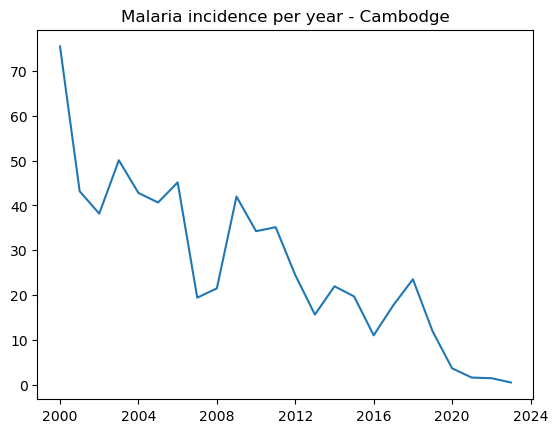

In [24]:
cambodge_df = mekong_data[mekong_data["GEO_NAME_SHORT"] == "Cambodge"]
cambodge_df.sort_index()
plt.plot(cambodge_df.index, cambodge_df.RATE_PER_1000_N)
#plt.fill_between(cambodge_df.index, cambodge_df.RATE_PER_1000_NL, cambodge_df.RATE_PER_1000_NU, alpha=0.6, label='Filled Area')
plt.title("Malaria incidence per year - Cambodge")
plt.show()

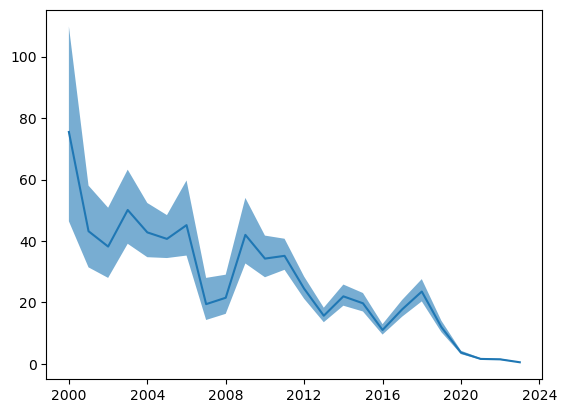

In [25]:
cambodge_df = mekong_data[mekong_data["GEO_NAME_SHORT"] == "Cambodge"]
cambodge_df.sort_index()
plt.plot(cambodge_df.index, cambodge_df.RATE_PER_1000_N)
plt.fill_between(cambodge_df.index, cambodge_df.RATE_PER_1000_NL, cambodge_df.RATE_PER_1000_NU, alpha=0.6, label='Filled Area')
plt.show()

In [26]:
def plot_ts(country):
    df = mekong_data[mekong_data["GEO_NAME_SHORT"] == country]
    df.sort_index()
    plt.plot(df.index, df.RATE_PER_1000_N)
    plt.fill_between(df.index, df.RATE_PER_1000_NL, df.RATE_PER_1000_NU, alpha=0.6, label='Filled Area')
    plt.title(country + " Malaria Incidence")
    plt.show()

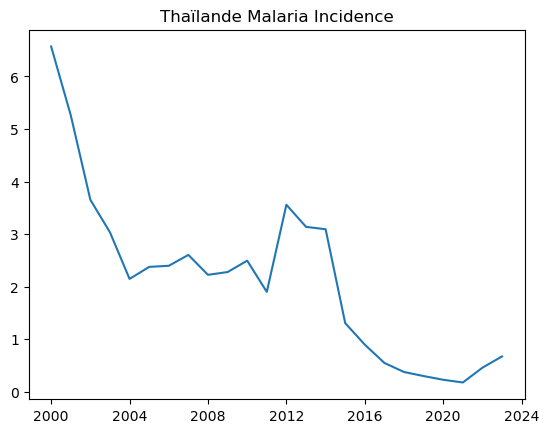

In [27]:
plot_ts("Thaïlande")

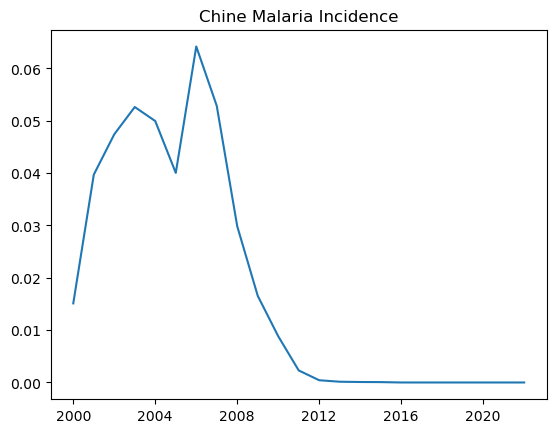

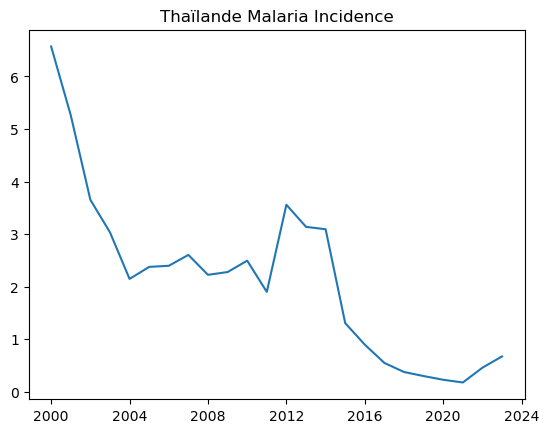

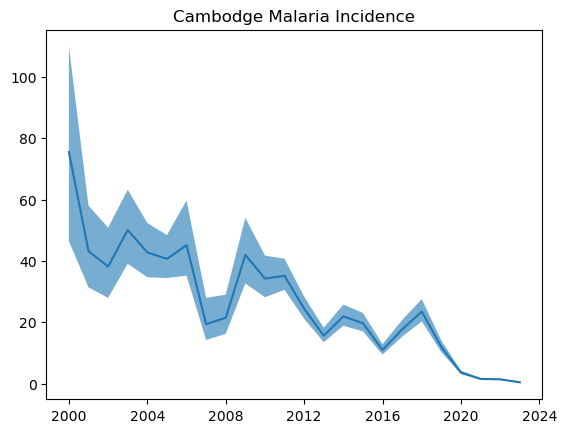

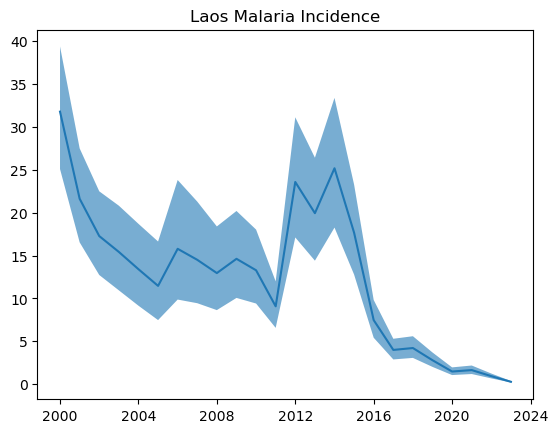

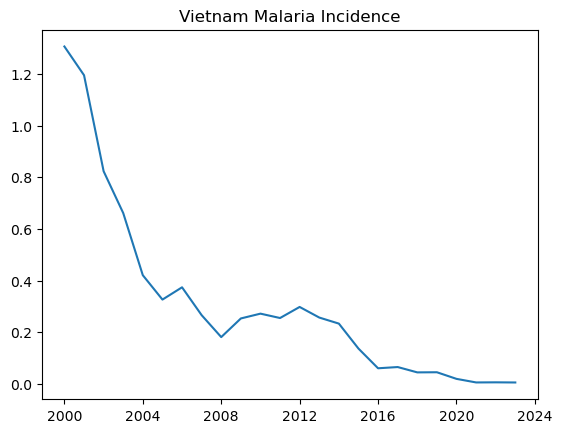

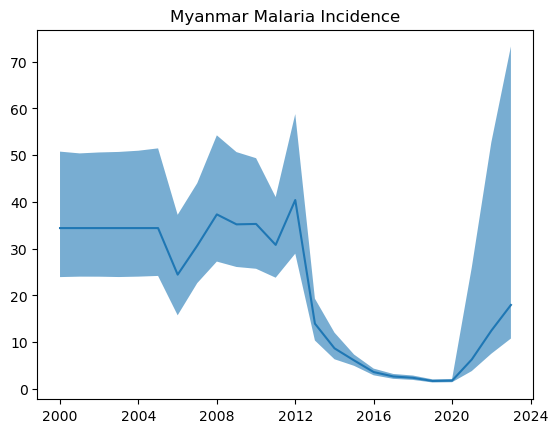

In [28]:
for i in country_mapping.values():
    plot_ts(i)

## Application aux données du Cambodge de la méthode Box=Jenkins

In [29]:
cambodge_df.head()

,GEO_NAME_SHORT,RATE_PER_1000_N,RATE_PER_1000_NL,RATE_PER_1000_NU
DIM_TIME,,,,
2000-01-01,Cambodge,75.473139,46.392687,109.827847
2001-01-01,Cambodge,43.162506,31.387142,58.005704
2002-01-01,Cambodge,38.163672,27.959118,50.814377
2003-01-01,Cambodge,50.073840,39.068474,63.203764
2004-01-01,Cambodge,42.781717,34.701896,52.354595


### Check for stationarity and perform differencing if necessary

In [30]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [31]:
# cambodge
# Perform the Augmented Dickey-Fuller test on the original series
result_original = adfuller(cambodge_df["RATE_PER_1000_N"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): 1.6270
p-value (Original): 0.9979
Interpretation: The original series is Non-Stationary.



### Apply first-order differencing

In [32]:
# Apply first-order differencing
cambodge_df['RATE_PER_1000_N_diff'] = cambodge_df['RATE_PER_1000_N'].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(cambodge_df["RATE_PER_1000_N_diff"].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")

ADF Statistic (Differenced): -0.9710
p-value (Differenced): 0.7637
Interpretation: The differenced series is Non-Stationary.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11860\9083739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cambodge_df['RATE_PER_1000_N_diff'] = cambodge_df['RATE_PER_1000_N'].diff()


### Apply second-order differencing

In [33]:
# Apply first-order differencing
cambodge_df['RATE_PER_1000_N_diff_2'] = cambodge_df['RATE_PER_1000_N_diff'].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(cambodge_df["RATE_PER_1000_N_diff_2"].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")

ADF Statistic (Differenced): -17.2287
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11860\4207586209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cambodge_df['RATE_PER_1000_N_diff_2'] = cambodge_df['RATE_PER_1000_N_diff'].diff()


### Plotting the second-differenced malaria incidence

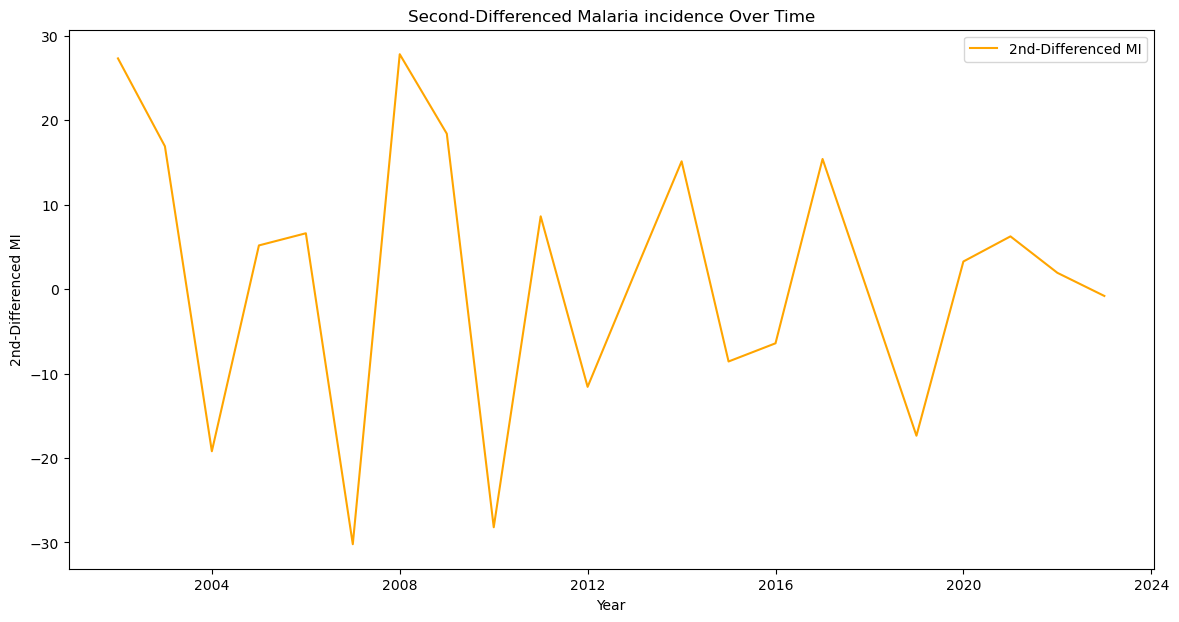

In [66]:
cambodge_df = cambodge_df.dropna()
# Plotting the second-differenced malaria incidence
plt.figure(figsize=(14, 7))
plt.plot(cambodge_df.index, cambodge_df['RATE_PER_1000_N_diff_2'], label='2nd-Differenced MI', color='orange')
plt.title('Second-Differenced Malaria incidence Over Time')
plt.xlabel('Year')
plt.ylabel('2nd-Differenced MI')
plt.legend()
plt.show()

### Model identification

### Finding the ARIMA terms

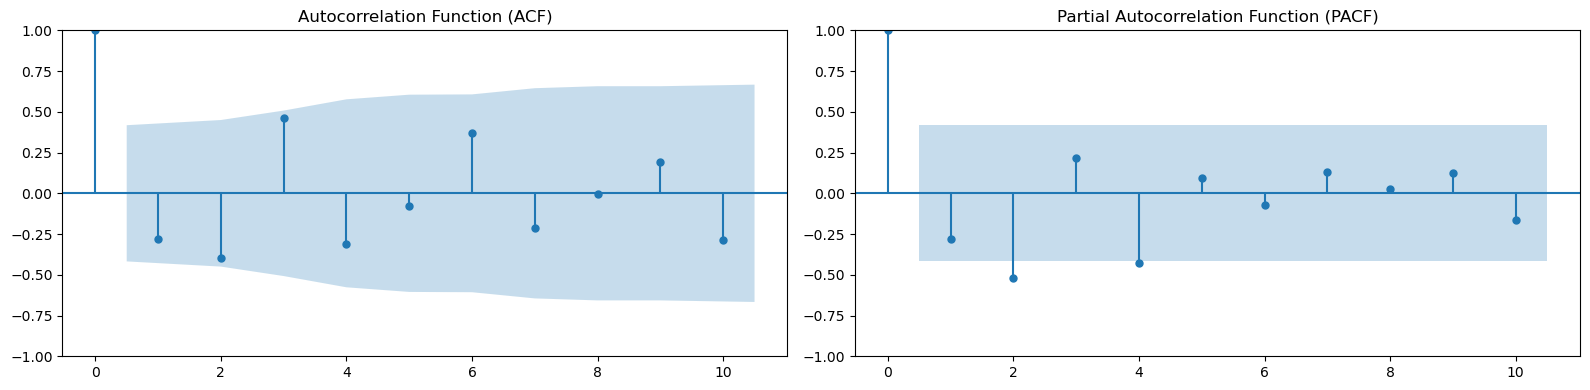

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(cambodge_df['RATE_PER_1000_N_diff_2'].dropna(), lags=10, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(cambodge_df['RATE_PER_1000_N_diff_2'].dropna(), lags=10, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

### Automated model selection

In [36]:
# Import pmdarima as pm
import pmdarima as pm

In [37]:
# Create model
model = pm.auto_arima(cambodge_df.RATE_PER_1000_N,
                      d=2,
                      seasonal=False,
                      trend='c',
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=168.625, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=167.505, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=168.625, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=159.169, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=159.187, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=159.169, Time=0.07 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0] intercept
Total fit time: 0.631 seconds


### Building and Evaluating the SARIMAX Model

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(cambodge_df.RATE_PER_1000_N, order=(2, 2, 0), seasonal_order=(0, 0, 0, 0))

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [39]:
results = model2.fit()

In [40]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:        RATE_PER_1000_N   No. Observations:                   22
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -75.602
Date:                Sun, 21 Sep 2025   AIC                            157.204
Time:                        09:15:42   BIC                            160.191
Sample:                    01-01-2002   HQIC                           157.787
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6397      0.203     -3.157      0.002      -1.037      -0.243
ar.L2         -0.6267      0.158     -3.971      0.000      -0.936      -0.317
sigma2       106.0629     31.683      3.348      0.0

Test de Jarque-Bera (JB)

Si la p-valeur est faible (typiquement inférieure à 0.05), on rejette l'hypothèse de normalité, ce qui signifie que les résidus ne suivent pas une distribution normale. 
#### La probabilité de Jarque-Bera = 0.48 (étant > 0.05), on ne rejette pas l'hypothèse de normalité.

Test de Ljung-Box (Q)

Si prob(Q) est faible, on rejette l'hypothèse nulle selon laquelle il n'y a pas d'autocorrélation, et on conclut que les résidus sont auto-corrélés
#### La probabilité de Ljung-Box = 0.88 (étant > 0.05), les résidus ne sont pas auto-corrélés.

En résumé
- Ces deux tests sont souvent utilisés conjointement pour évaluer la qualité des résidus d'un modèle de série chronologique : 
- On souhaite que les résidus soient normaux (test de Jarque-Bera) et non auto-corrélés (test de Ljung-Box).
- Des résidus qui satisfont ces deux conditions suggèrent que le modèle est bien spécifié et que la prédiction peut être fiable. 

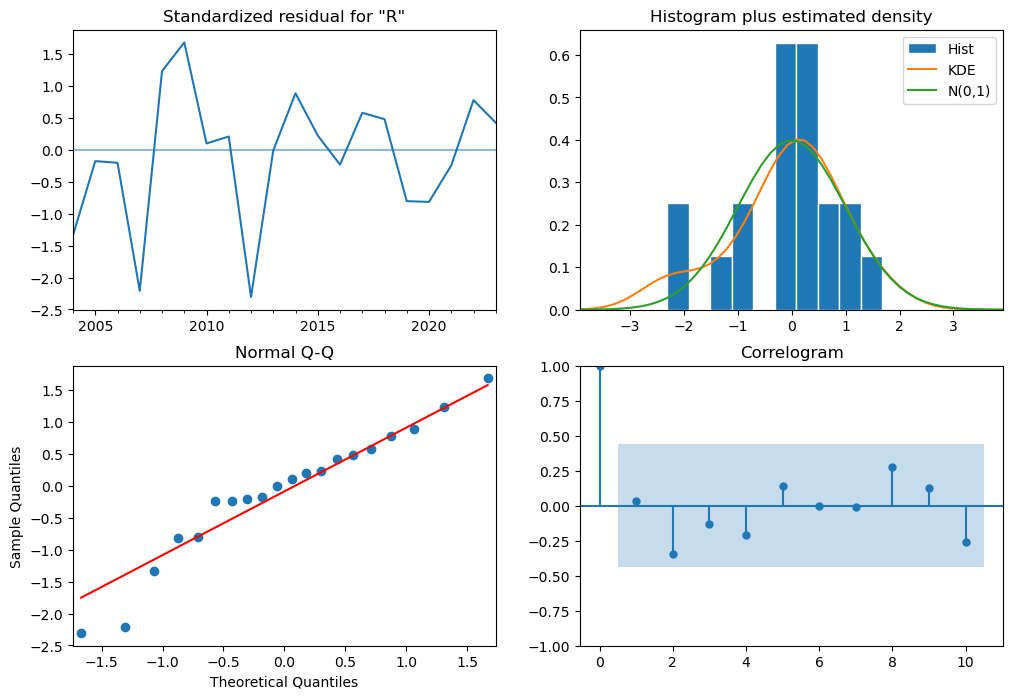

In [41]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

### Mean absolute error

In [42]:
results.resid

DIM_TIME
2002-01-01    38.163672
2003-01-01    -7.172089
2004-01-01   -19.202533
2005-01-01    -2.387373
2006-01-01    -2.120925
2007-01-01   -22.743559
2008-01-01    12.621199
2009-01-01    17.254487
2010-01-01     0.994589
2011-01-01     2.103500
2012-01-01   -23.736377
2013-01-01    -0.137881
2014-01-01     9.067024
2015-01-01     2.273731
2016-01-01    -2.425752
2017-01-01     5.922370
2018-01-01     4.900960
2019-01-01    -8.303505
2020-01-01    -8.422030
2021-01-01    -2.549559
2022-01-01     7.962792
2023-01-01     4.327557
dtype: float64

In [43]:
mae = np.mean(abs(results.resid))

In [44]:
mae

9.308793752402964

In [45]:
cambodge_df['RATE_PER_1000_N'].min(), cambodge_df['RATE_PER_1000_N'].max()

(0.485030571, 50.07383995)

In [46]:
st_pred = results.get_prediction(-6, dynamic=False)
pred_values = st_pred.predicted_mean

In [47]:
pred_values

2018-01-01    18.616465
2019-01-01    20.250478
2020-01-01    12.064664
2021-01-01     4.128322
2022-01-01    -6.523965
2023-01-01    -3.842526
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [48]:
dyn_pred = results.get_prediction(-6, dynamic=True)
dyn_pred_values = dyn_pred.predicted_mean

In [49]:
dyn_pred_values

2018-01-01    18.616465
2019-01-01    13.583774
2020-01-01    15.992941
2021-01-01    17.352671
2022-01-01    14.720231
2023-01-01    15.299280
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [50]:
from datetime import datetime

st_pred_entire = results.get_prediction(start = cambodge_df.index[0], end = cambodge_df.index[-1], dynamic=False)
pred_values_entire = st_pred_entire.predicted_mean

In [51]:
pred_values_entire

2002-01-01     0.000000
2003-01-01    57.245928
2004-01-01    61.984250
2005-01-01    43.045069
2006-01-01    47.260859
2007-01-01    42.157414
2008-01-01     8.872601
2009-01-01    24.716149
2010-01-01    33.253811
2011-01-01    33.036939
2012-01-01    48.193010
2013-01-01    15.779848
2014-01-01    12.885696
2015-01-01    17.416209
2016-01-01    13.433290
2017-01-01    11.804545
2018-01-01    18.616465
2019-01-01    20.250478
2020-01-01    12.064664
2021-01-01     4.128322
2022-01-01    -6.523965
2023-01-01    -3.842526
Freq: YS-JAN, Name: predicted_mean, dtype: float64

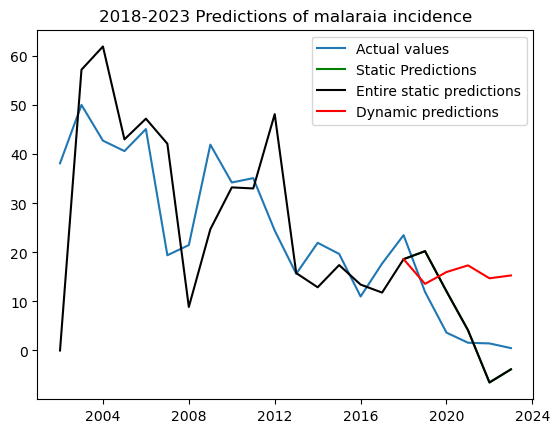

In [52]:
plt.plot(cambodge_df.index, cambodge_df.RATE_PER_1000_N, label="Actual values")
plt.plot(pred_values.index, pred_values, label="Static Predictions", color="green")
plt.plot(pred_values_entire.index, pred_values_entire, label="Entire static predictions", color="black")
plt.plot(dyn_pred_values.index, dyn_pred_values, label="Dynamic predictions", color="red")
plt.title("2018-2023 Predictions of malaraia incidence")
plt.legend()
plt.show()

In [53]:
forecast = results.get_forecast(6)
forecast_values = forecast.predicted_mean

In [54]:
forecast_values

2024-01-01   -1.153779
2025-01-01   -1.844363
2026-01-01   -2.712270
2027-01-01   -4.060955
2028-01-01   -4.990958
2029-01-01   -5.887515
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [55]:
forecast_values_int = forecast.conf_int()

In [56]:
forecast_values_int

,lower RATE_PER_1000_N,upper RATE_PER_1000_N
2024-01-01,-21.338827,19.031270
2025-01-01,-35.922898,32.234173
2026-01-01,-48.340418,42.915878
2027-01-01,-67.534297,59.412387
2028-01-01,-88.122976,78.141059
2029-01-01,-107.895818,96.120788


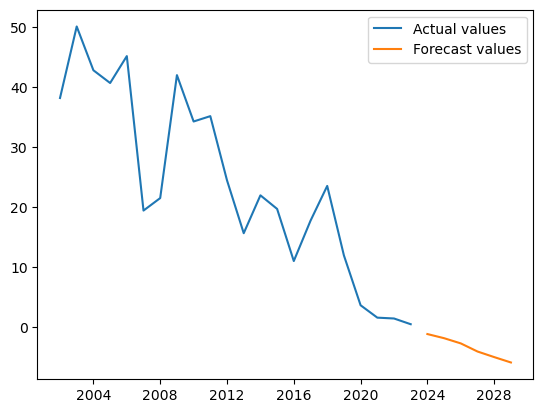

In [57]:
plt.plot(cambodge_df.index, cambodge_df.RATE_PER_1000_N, label="Actual values")
plt.plot(forecast_values.index, forecast_values, label="Forecast values")
plt.legend()
plt.show()

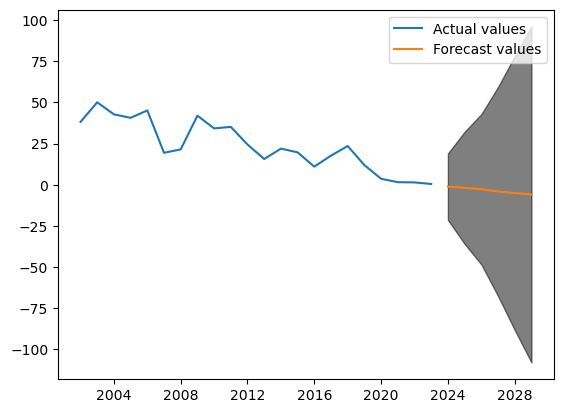

In [58]:
plt.plot(cambodge_df.index, cambodge_df.RATE_PER_1000_N, label="Actual values")
plt.plot(forecast_values.index, forecast_values, label="Forecast values")
plt.fill_between(forecast_values_int.index, forecast_values_int.iloc[:,0], forecast_values_int.iloc[:,1], color="k", alpha=0.5)
plt.legend()
plt.show()

In [59]:
type(model2)

statsmodels.tsa.statespace.sarimax.SARIMAX

In [60]:
type(model)

pmdarima.arima.arima.ARIMA

### On peut sauvegarder le modèle "model" de type pmdarima.arima.arima.ARIMA sous forme de fichier pickle

In [61]:
# Import joblib
import joblib

# Set model name
filename = 'data/malaria_incidence_model.pkl'

# Pickle it
joblib.dump(model,filename)

['data/malaria_incidence_model.pkl']

### On peut recuperer le fichier pickle par la commande
loaded_model = joblib.load("path_to_file") # "data/malaria_incidence_malaria"

In [62]:
# Projection pop cambodge 2024-2029
#year = [2024, 2025, 2026, 2027, 2029]
#pop = [17.64, 17.85, 18.00, 18.40, 18.1]

In [63]:
#pop_projection = pd.Series(pop, index = year)

In [64]:
#pop_projection

In [65]:
#Prob(Q): 0.69 Not correlated        # < 0.05 => correlated
#Prob(JB):0.15 Normally distributed  # < 0.05 => Not normally distributed
#0.88
#0.48